In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('homework.csv')

In [15]:
df.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


### На первый взглад все переменные могут влиять на итоговую стоимость. Попробую построить тепловую карту и посмотреть зависимости.

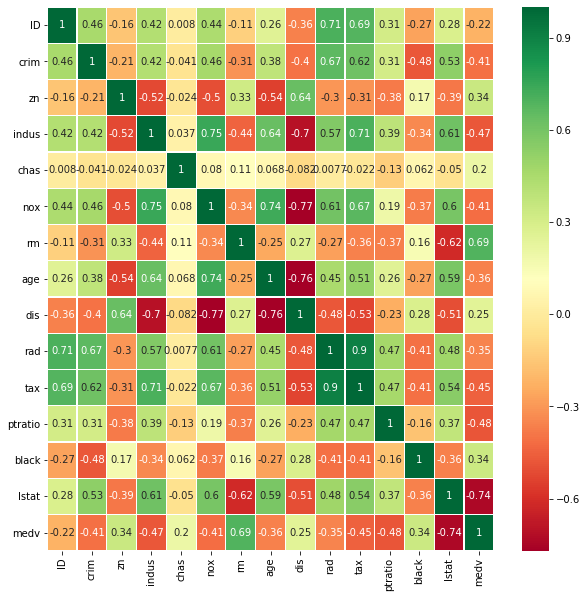

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

### Удаляю столбцы с маленьким коэффициентом корреляции (ID, chas, dis)

In [12]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [13]:
df_filtered = df[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']]

In [14]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(10), int64(2)
memory usage: 31.3 KB


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [20]:
X, Y = df_filtered[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'rad', 'tax', 'ptratio', 'black', 'lstat']], df_filtered['medv']

In [21]:
X.head()

,crim,zn,indus,nox,rm,age,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0.458,6.998,45.8,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0.458,7.147,54.2,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0.524,6.012,66.6,5,311,15.2,395.60,12.43


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_train

array([[-0.48690531, -0.4691304 , -1.12561221, ..., -0.29690472,
         0.41083226, -0.96345951],
       [-0.49470068,  3.41769496, -1.1888392 , ..., -1.46450755,
         0.39450912, -0.65486454],
       [-0.47857442,  0.99922584, -0.74050236, ..., -1.09087465,
         0.34225069, -1.08402685],
       ...,
       [-0.45201059, -0.4691304 ,  1.52992136, ...,  1.29103513,
         0.36186283,  1.27851885],
       [-0.49008304,  3.6336297 , -1.23051153, ..., -1.74473223,
         0.3708771 , -1.23473602],
       [-0.47856023, -0.4691304 , -1.26212502, ..., -0.29690472,
         0.42106468, -0.96633016]])

In [26]:
linear = LinearRegression()

In [28]:
linear.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
linear.predict(X_test)

array([22.69807533,  8.48127244, 22.61671905, 22.833807  , 28.6617085 ,
       25.15911509, 30.20828507, 17.72568125, 24.65730908, 21.14058283,
       23.46423461, 24.03977949, 27.42076885, 31.54955502, 20.99362835,
       25.7842432 , 32.96355898, 10.28010306, 21.48601576, 10.56641962,
       21.03960725, 16.90513524, 20.4701241 , 12.96820163, 24.42365818,
       10.15136815, 29.26148215, 23.05924914, 20.55222949, 20.47750082,
       12.99226761, 26.08810323, 21.86907896, 21.6513729 , 31.3550396 ,
       13.68715855, 23.60752146, 33.27332962, 30.86698704, 20.80733796,
       15.98681199, 27.19218531, 17.90039365, 21.04070262, 24.70000538,
       21.77404142, 10.90267765, 28.93442454, 25.30812849, 30.05023799,
       31.37816179, -1.65518553, 18.06714794, 28.84246204, 19.42002982,
       25.22569985, 20.97870222, 20.51240277, 20.74262486, 11.12254701,
       20.30322579, 32.41310417, 12.48220548, 24.79170041, 18.54020395,
       27.04390312, 25.50351372])

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [33]:
mean_squared_error ( Y_test ,  linear.predict(X_test) ) 

46.78495114575756

In [35]:
r2_score ( Y_test ,  linear.predict(X_test) ) 

0.4183004752603602

In [38]:
mean_absolute_error ( Y_test ,  linear.predict(X_test) ) 

4.136412657434317

### Метрики указывают на недостаточное качество модели. Попробую еще раз, удалив только столбец ID.

In [65]:
df_filtered_1 = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']]

In [66]:
df_filtered_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 36.5 KB


In [68]:
X1, Y1 = df_filtered_1[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']], df_filtered_1['medv']

In [69]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2)
sc1 = StandardScaler()
X1_train = sc1.fit_transform(X1_train)
X1_test = sc1.transform(X1_test)

In [70]:
linear1 = LinearRegression()

In [71]:
linear1.fit(X1_train, Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
linear1.predict(X1_test)

array([11.29309546, 20.77341263, 23.40022716, 26.0670741 , 24.08797835,
       18.38946198, 23.66184279, 18.42740227, 23.08123694, 20.75667507,
       33.99670648, 30.61721921, 12.87616496, 27.51629001, 10.07397014,
       27.61868797, 15.63132346, 25.47030484, 30.57991727, 17.58619231,
       29.8816469 ,  8.41962856, 27.10442252, 23.90866563, 12.39738163,
       15.81505404, 22.39515892, 31.22487633, 20.79179729, 17.66445416,
       23.40919935, 42.02304687, 32.3961877 , 31.47848014, 15.71647681,
       29.50564115, 20.01368732, 34.42698375, 35.53732723, 20.31908934,
       10.9358522 , 29.72132388, 19.07251676, 23.92358587, 25.76526992,
       23.27678791, 18.17205281, 33.73491784, 15.45522091, 17.94304485,
       20.99373082, 37.83636335, 19.04877545, 26.05274111, 24.75477369,
       23.12954866, 15.4911837 , 19.55367926, 32.05853263, 27.60701768,
       15.17358227, 24.16165545, 21.20417517, 33.90636261, 24.53379406,
       14.63328308, 21.07855047])

In [80]:
mean_squared_error ( Y1_test ,  linear1.predict(X1_test) ) 

19.117413122072204

In [82]:
r2_score ( Y1_test ,  linear1.predict(X1_test) ) 

0.7238787235143247

In [83]:
mean_absolute_error ( Y1_test ,  linear1.predict(X1_test) ) 

3.163916471476114

### Результат лучше. Делаю вывод о том, что не всегда стоит удалять переменные, которые слабо влияют на целевую переменную.